# Исследование рынка общественного питания Москвы

Цель исследования - анализ рынка общественного питания Москвы для определения оптимального вида заведения, количества посадочных мест, а также его месторасположения

План исследования:

 - 1  Загрузка данных и подготовка к анализу
 - 2  Анализ данных
   *  Исследование объектов различных типов 
   *  Анализ размера заведений
   *  Изучение территориальных различий
 - 3  Вывод

### Загрузка и предобработка данных

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
plt.style.use('seaborn')
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/rest_data.csv')
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [7]:
data.duplicated().sum()

0

В представленных данных информация о 15366 кафе, расположенных в Москве. В данных нет полных дубликатов и пропущенных значений.
Некоторые типы данных нужно оптимизировать

Изменим форматы данных

In [8]:
data['id'] = pd.to_numeric(data['id'], downcast='signed')
data['number'] = pd.to_numeric(data['number'], downcast='signed')
data['chain'] = data['chain'].replace('нет', False)
data['chain'] = data['chain'].replace('да', True)
data['chain'] = data['chain'].astype(bool)
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int32 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  bool  
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int16 
dtypes: bool(1), int16(1), int32(1), object(3)
memory usage: 465.3+ KB


In [10]:
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].str.lower()
    
data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [11]:
# Проверим данные на дубликааты без учета столбца 'id'

data = data.drop_duplicates(subset=['object_name','chain','object_type','address','number'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int32 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  bool  
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int16 
dtypes: bool(1), int16(1), int32(1), object(3)
memory usage: 582.0+ KB


После удаления дубликатов датасет сократился на 85 записей

### Анализ данных

#### Исследование объектов различных типов

In [12]:
# Изучим распределение количества заведений по типу

type_amount = data['object_type'].value_counts().to_frame().reset_index()
total_amount = data.shape[0]
type_amount.columns = ['type','amount']
type_amount['share'] = type_amount['amount']/total_amount*100
type_amount

,type,amount,share
0,кафе,6071,39.729075
1,столовая,2584,16.909888
2,ресторан,2282,14.933578
3,предприятие быстрого обслуживания,1897,12.414109
4,бар,855,5.595184
5,буфет,576,3.769387
6,кафетерий,395,2.584909
7,закусочная,348,2.277338
8,магазин (отдел кулинарии),273,1.786532


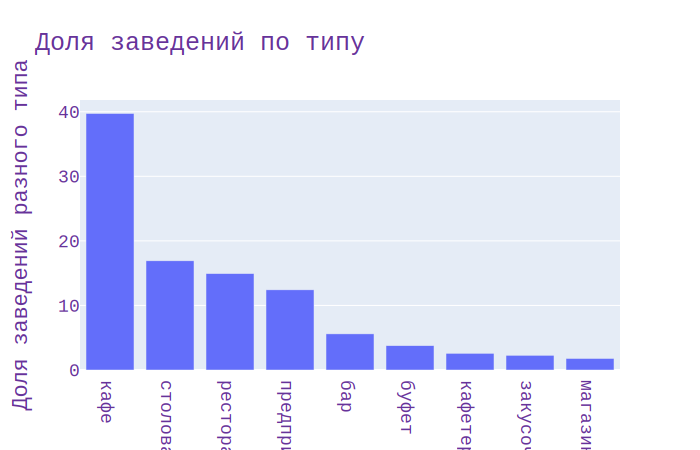

In [46]:

fig = px.bar(
    type_amount, x='type', y='share', title='Доля заведений по типу'
)
fig.update_layout(
    xaxis_title="",
    yaxis_title="Доля заведений разного типа",
    
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show("svg")

Наибольшая часть заведений общественного питания, почти 40% - это кафе. Затем идут примерно с одинаковымис близкими показателями столовые, рестораны и предприятия быстрого обслуживания. Меньше всего в Москве буфетов,кафетериев, закусочных и отделов кулинарии.

In [14]:
# Исследуем соотношение сетевых и несетевых заведений по количеству

chain_amount = data['chain'].value_counts().to_frame().reset_index()

chain_amount.columns = ['chain','amount']
chain_amount['share'] = chain_amount['amount']/total_amount*100
chain_amount['chain'] = chain_amount['chain'].replace(True, 'Сетевое')
chain_amount['chain'] = chain_amount['chain'].replace(False, 'Не сетевое')
chain_amount

,chain,amount,share
0,Не сетевое,12317,80.603364
1,Сетевое,2964,19.396636


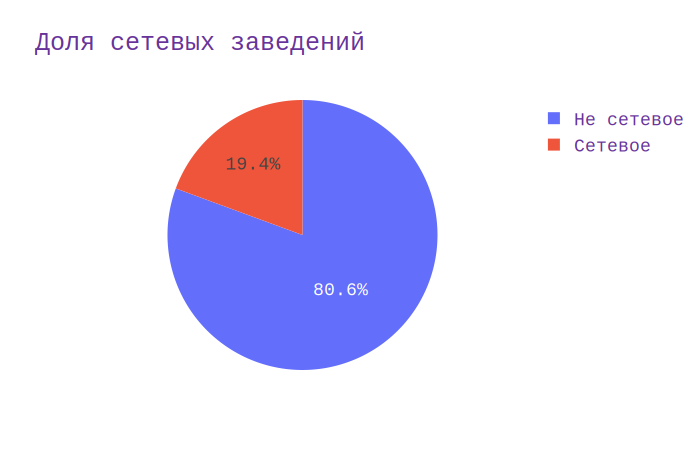

In [47]:
fig = go.Figure(data=[go.Pie(labels=chain_amount['chain'], values=chain_amount['share'])])
fig.update_layout(
    title="Доля сетевых заведений",
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show("svg")

Число сетевых заведение в 4 раза меньше, чем несетевых. В абсолютных числах объекты разделены в соотношении 2968 на 12398 соответственно.

In [16]:
# Расмотрим, для какого вида объекта общественного питания характерно сетевое распространение

type_chain = data[data['chain']]['object_type'].value_counts().to_frame().reset_index()
type_chain.columns = ['type', 'chain']
type_chain

,type,chain
0,кафе,1396
1,предприятие быстрого обслуживания,788
2,ресторан,543
3,магазин (отдел кулинарии),78
4,закусочная,56
5,кафетерий,52
6,бар,37
7,буфет,11
8,столовая,3


In [17]:
not_chain= data[~data['chain']].groupby('object_type')['object_name'].count().reset_index()

type_chain = type_chain.merge(not_chain[['object_name','object_type']], left_on = 'type', right_on = 'object_type').drop('object_type', axis = 1)
type_chain.columns = ['type', 'chain', 'not_chain']



In [18]:
type_chain['total'] = type_chain['chain']+type_chain['not_chain']
type_chain['share'] = type_chain['chain']/type_chain['total']*100
type_chain = type_chain.sort_values('share', ascending = False).reset_index(drop = True)
type_chain

,type,chain,not_chain,total,share
0,предприятие быстрого обслуживания,788,1109,1897,41.539273
1,магазин (отдел кулинарии),78,195,273,28.571429
2,ресторан,543,1739,2282,23.794917
3,кафе,1396,4675,6071,22.994564
4,закусочная,56,292,348,16.091954
5,кафетерий,52,343,395,13.164557
6,бар,37,818,855,4.327485
7,буфет,11,565,576,1.909722
8,столовая,3,2581,2584,0.116099


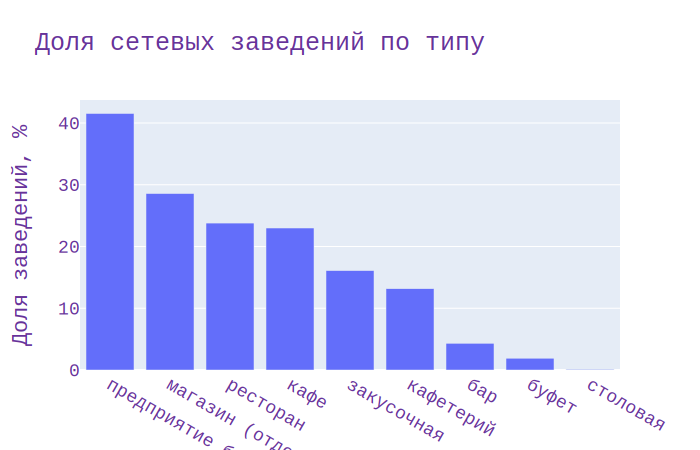

In [48]:
fig = px.bar(
    type_chain, x='type', y='share', title='Доля сетевых заведений по типу'
)
fig.update_layout(
    xaxis_title="",
    yaxis_title="Доля заведений, %",
    
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show("svg")

In [20]:
data\
    .assign(is_chain=lambda row: row['chain'].map({True: 'Сетевой', False: 'Несетевой'}))\
    .pivot_table(index='object_type', columns='is_chain', values='id', aggfunc='count')\
    .assign(share=lambda row: row['Сетевой'] / row.sum(axis=1))\
    .sort_values(by='share', ascending=False)\
    .style.bar(subset=['share'], color='#98C6FF')

is_chain,Несетевой,Сетевой,share
object_type,,,
предприятие быстрого обслуживания,1109,788,0.415393
магазин (отдел кулинарии),195,78,0.285714
ресторан,1739,543,0.237949
кафе,4675,1396,0.229946
закусочная,292,56,0.160920
кафетерий,343,52,0.131646
бар,818,37,0.043275
буфет,565,11,0.019097
столовая,2581,3,0.001161


<hr style="border: 2px solid red;" />

Наибольшее число сетевых заведений в своем виде среди предприятий быстрого обслуживания, более 40% от общего числа. За ними идут рестораны (около 28.6%) и кафе(около 23.8%). Меньше всего сетевых баров, буфетов и столовых (менее 5% в каждой категории)

#### Анализ размера заведений

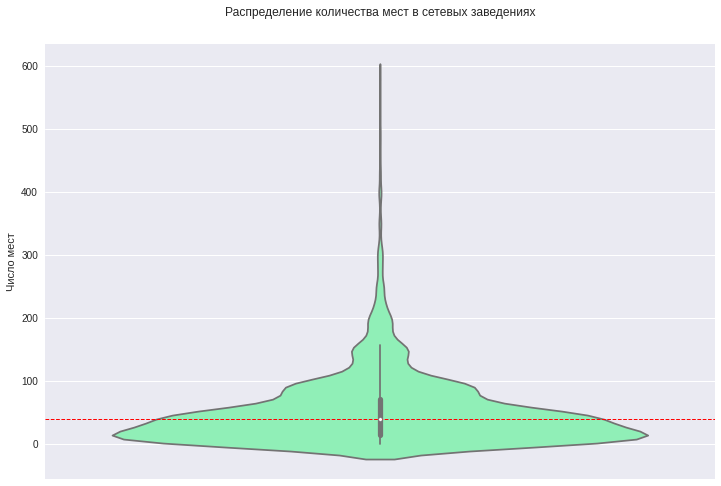

In [21]:
# Изучим распределение количества мест в сетевых заведениях

chains = data[data['chain']]

fig, ax = plt.subplots(figsize=(12,8))
sns.violinplot( y='number', data=chains, palette='rainbow').set_title("Распределение количества мест в сетевых заведениях")
ax.set_ylabel('Число мест')
plt.axhline(chains['number'].median(), ls='--', linewidth=1, color='red')

ttl = ax.title
ttl.set_position([.5, 1.05])
plt.show()

На графике хорошо видно медианное занчение - около 40 мест. Основная часть объектов имеют примерно от 20 до 70 мест, но встречаются заведения с 500-600 посадочными местами. 

Изучим более детально что характерно для отдельных сетей - много объектов с небольшим числом посадочных мест в каждом или мало объектов с большим количеством посадочных мест

In [22]:
chains_grouped = chains.groupby('object_name')['number'].agg(['count','max', 'min','median']).sort_values('count', ascending = False).reset_index().reset_index()
chains_grouped.head(10)

,index,object_name,count,max,min,median
0,0,шоколадница,157,150,7,50.0
1,1,kfc,155,400,0,45.0
2,2,макдоналдс,150,580,0,77.5
3,3,бургер кинг,137,150,0,45.0
4,4,теремок,94,200,0,23.0
5,5,крошка картошка,90,120,0,15.0
6,6,домино'с пицца,90,50,4,16.0
7,7,милти,72,40,0,0.0
8,8,суши wok,72,22,0,6.0
9,9,папа джонс,51,63,0,20.0


Для крупнейших сетей характерные значения числа мест не превышают 75, хотя максимальные значения иногда значительно больше - до 480 мест.
Построим это распределение на графике

In [23]:
chains = chains.merge(chains_grouped[['object_name','count']], on = 'object_name')
chains = chains.sort_values(['count','object_name'])

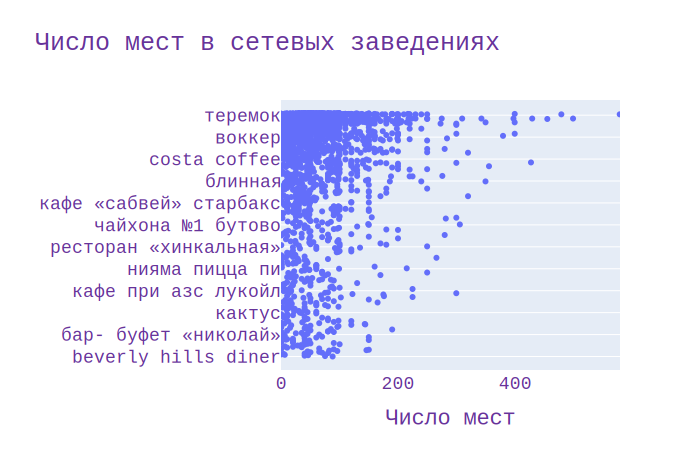

In [49]:
fig = px.strip(chains, x="number", y="object_name", title='Число мест в сетевых заведениях')
fig.update_layout(
    xaxis_title="Число мест",
    yaxis_title="",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ),
    width=1000,
    height=1000)
fig.show("svg")

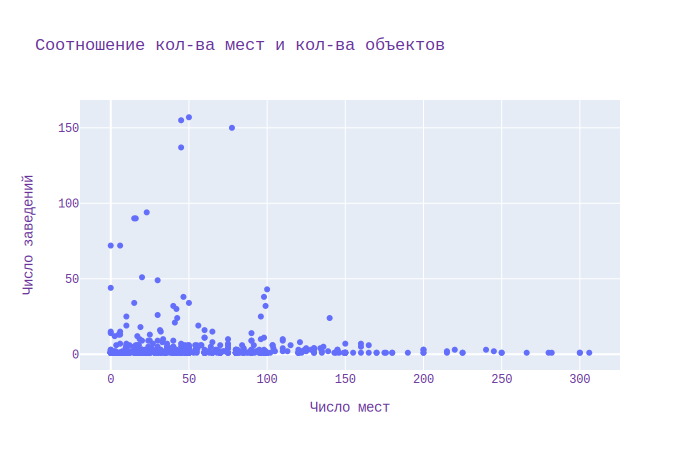

In [50]:

fig = px.scatter(
    chains_grouped, y='count', x='median', title='Соотношение кол-ва мест и кол-ва объектов'
)
fig.update_layout(
    width=880,
    height=580,
    xaxis_title="Число мест",
    yaxis_title="Число заведений",
    
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.show("svg")

In [26]:
tmp_ = chains.groupby('object_name', as_index=False).agg({'number': ['mean', 'count']})
tmp_.columns = ['name', 'mean_number', 'count_objects']

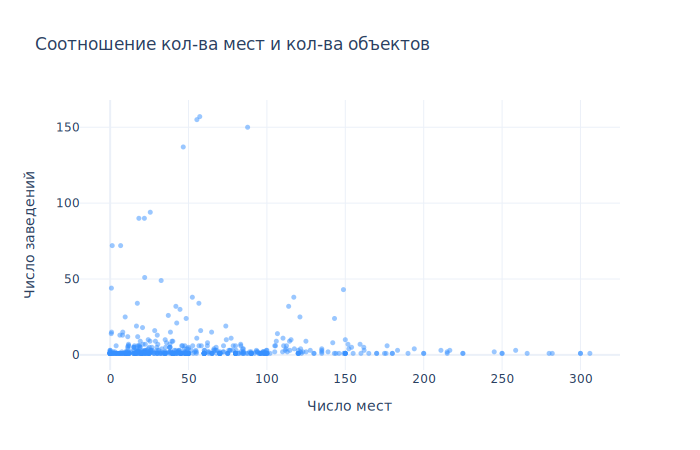

In [51]:
fig = go.Figure(data=[
    go.Scatter(x=tmp_['mean_number'], y=tmp_['count_objects'], mode='markers',
              marker=dict(color='#3690FF', size=5, opacity=0.5))
])
fig.update_layout(
    title='Соотношение кол-ва мест и кол-ва объектов',
    xaxis_title="Число мест",
    yaxis_title="Число заведений",
    width=960,
    height=480, 
    template='plotly_white')
fig.show("svg")

<hr style="border: 2px solid orange;" />

В абсолютном большинстве сетей число посадочных мест не превышает 100. Чем больше чиcло объектов в сети, тем чаще встречаются крупные заведения, однако плотность распределения все равно гораздо выше в области низких значений.

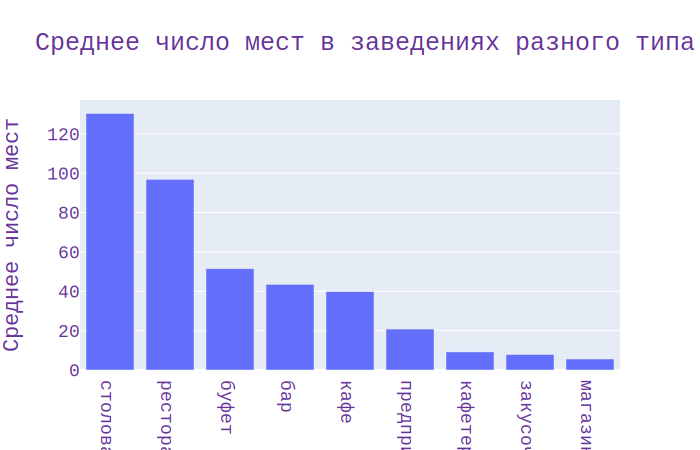

In [52]:
# Рассчитаем среднее количество посадочных мест для каждого вида объекта общественного питания


place_avg = data.groupby('object_type')['number'].mean().sort_values(ascending = False).reset_index()
place_avg

fig = px.bar(
    place_avg, x='object_type', y='number', title='Среднее число мест в заведениях разного типа'
)
fig.update_layout(
    xaxis_title="",
    yaxis_title="Среднее число мест",
    
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show("svg")

Наибольшее среднее число посадочных мест в столовых (около 130), затем следуют рестораны с чуть менее 100 мест. Меньше всего посадочных мест в среднем в кафетериях, закусочных и отделах кулинарии (менее 10 мест)

#### Изучение территориальных различий

Выделим название улиц из адресов объектов для дальнейшего анализа

In [29]:
data['split_addres'] = data['address'].str.split(',')
data['street'] = data['split_addres'].apply(lambda x: x[1])
data['city'] = data['split_addres'].apply(lambda x: x[0])
data['street'] = data['street'].str.replace('^ ','')

In [30]:
streets_by_amount = data['street'].value_counts().sort_values(ascending = False).reset_index()
streets_by_amount.columns = ['streetname', 'object_amount']

streets_by_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   streetname     1900 non-null   object
 1   object_amount  1900 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.8+ KB


На первом месте по числу заведений находится Зеленоград, т.к. в большом числе адресов объектов в этом городе отсутствует улица.

In [31]:
top_streets = streets_by_amount.head(10)

top_streets

,streetname,object_amount
0,город зеленоград,232
1,проспект мира,203
2,профсоюзная улица,181
3,ленинградский проспект,170
4,пресненская набережная,167
5,варшавское шоссе,161
6,ленинский проспект,147
7,поселение сосенское,137
8,проспект вернадского,128
9,кутузовский проспект,114


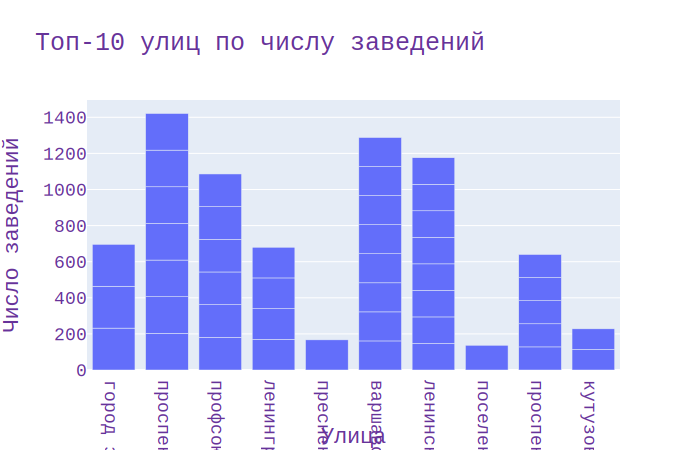

In [56]:

fig = px.bar(
    top_streets, x='streetname', y='object_amount', title='Топ-10 улиц по числу заведений'
)
fig.update_layout(
    
    xaxis_title="Улица",
    yaxis_title="Число заведений",
    
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show("svg")

В первую десятку самых популярных улиц для заведений общественного питания вошли основные проспекты и шоссе,на которых расположено от 100 до 250 объектов. 

Для дальнейшего анализа нам понадобится таблица с информацией о районах и улицах Москвы. Загрузим ее <b> с сайта службы МосГаз </b> и сохраним в Google Drive


In [33]:
# areas = pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
url = 'https://drive.google.com/file/d/108_nKStWPKL5eCERbgUFZeUQI_EOKrFh/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
areas = pd.read_csv(path)
areas['streetname'] = areas['streetname'].str.lower()

areas.head()

,streetname,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район


Обогатим наш датасет новыми данными

In [34]:
top_streets = top_streets.merge(areas, left_on='streetname', right_on='streetname',  how = 'left')


In [35]:
top_streets

,streetname,object_amount,areaid,okrug,area
0,город зеленоград,232,51.0,Зеленоград,Район Крюково
1,город зеленоград,232,52.0,Зеленоград,Район Матушкино-Савелки
2,город зеленоград,232,53.0,Зеленоград,Панфиловский район
3,проспект мира,203,70.0,СВАО,Алексеевский район
4,проспект мира,203,86.0,СВАО,Ярославский Район
5,проспект мира,203,78.0,СВАО,Район Марьина роща
6,проспект мира,203,79.0,СВАО,Останкинский район
7,проспект мира,203,81.0,СВАО,Район Ростокино
8,проспект мира,203,82.0,СВАО,Район Свиблово
9,проспект мира,203,16.0,ЦАО,Мещанский район


Видно, что большинство популярных улиц проходят через несколько районов Москвы,поэтому мы получили сразу 43 района,в которых находятся эти улицы. Для определения популярного месторасположения кафе нужно использовать более точные геоданные.

In [36]:
pd.options.display.max_colwidth = -1

In [37]:
top_streets.groupby('streetname', as_index=False).agg({'area': set})

,streetname,area
0,варшавское шоссе,"{Район Южное Бутово, Нагорный район, Район Чертаново Северное, Донской район, Район Чертаново Центральное, Район Северное Бутово, Район Нагатино-Садовники, Район Чертаново Южное}"
1,город зеленоград,"{Район Матушкино-Савелки, Панфиловский район, Район Крюково}"
2,кутузовский проспект,"{Район Фили-Давыдково, Район Дорогомилово}"
3,ленинградский проспект,"{Район Аэропорт, Хорошевский район, Район Сокол, Район Беговой}"
4,ленинский проспект,"{Район Якиманка, Район Теплый Стан, Донской район, Район Проспект Вернадского, Район Тропарево-Никулино, Район Гагаринский, Обручевский район, Ломоносовский район}"
5,поселение сосенское,{nan}
6,пресненская набережная,{Пресненский район}
7,проспект вернадского,"{Район Раменки, Район Проспект Вернадского, Район Тропарево-Никулино, Район Гагаринский, Ломоносовский район}"
8,проспект мира,"{Алексеевский район, Район Марьина роща, Район Свиблово, Мещанский район, Район Ростокино, Ярославский Район, Останкинский район}"
9,профсоюзная улица,"{Академический район, Район Теплый Стан, Район Ясенево, Район Черемушки, Район Коньково, Обручевский район}"


<hr style="border: 2px solid orange;" />

In [38]:
# Найдем все улицы с единственным заведением общепита 


one_object_street = streets_by_amount[streets_by_amount['object_amount']==1]
one_object_street

,streetname,object_amount
1321,1-я боевская улица,1
1322,несвижский переулок,1
1323,тихвинский переулок,1
1324,козицкий переулок,1
1325,новорублёвская улица,1
...,...,...
1895,улица рогова,1
1896,улица немчинова,1
1897,композиторская улица,1
1898,дивизионная улица,1


In [39]:
# Найдем в каких районах расположены эти улицы

area_with_one_object = one_object_street.merge(areas, left_on='streetname', right_on='streetname', how = 'inner')
area_with_one_object

,streetname,object_amount,areaid,okrug,area
0,1-я боевская улица,1,26,ВАО,Район Сокольники
1,несвижский переулок,1,20,ЦАО,Район Хамовники
2,тихвинский переулок,1,19,ЦАО,Тверской район
3,козицкий переулок,1,19,ЦАО,Тверской район
4,новорублёвская улица,1,40,ЗАО,Район Кунцево
...,...,...,...,...,...
555,улица рогова,1,93,СЗАО,Район Щукино
556,улица немчинова,1,67,САО,Тимирязевский Район
557,композиторская улица,1,12,ЦАО,Район Арбат
558,дивизионная улица,1,43,ЗАО,Район Внуково


In [40]:
area_with_one_object_grouped = area_with_one_object.groupby('area')['streetname'].count().sort_values(ascending = True).reset_index()
area_with_one_object_grouped.columns = ['area', 'amount']
print("Непопулярных районов :",area_with_one_object_grouped['area'].nunique())

Непопулярных районов : 99


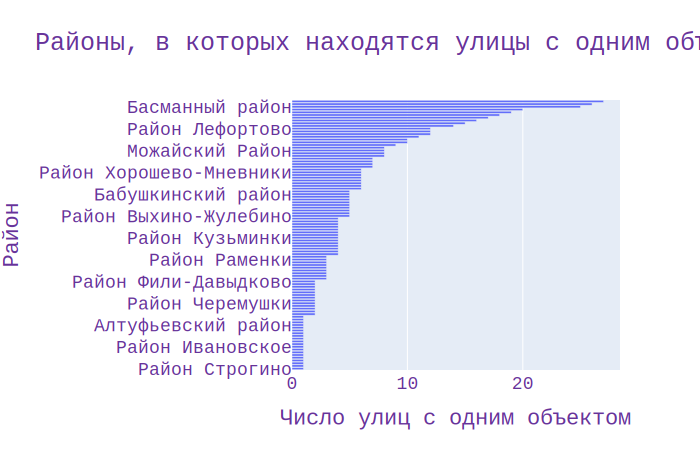

In [57]:

fig = px.bar(
    area_with_one_object_grouped, y='area', x='amount', title='Районы, в которых находятся улицы с одним объектом',
    orientation = 'h'
)
fig.update_layout(
    yaxis_title="Район",
    xaxis_title="Число улиц с одним объектом",
    width=1000,
    height=1500,
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show("svg")

Районов с улицами с одиночными объектами еще больше, чем с Топ-10 популярных улиц. При этом, в верхней части графика находятся районы, в которых таких улиц достаточно много (7-27 шт.) Это довольно популярные районы в центральной части города с маленькими улочками. В нижней части графика преимущественно спальные районы, где заведений общепита в целом очень мало.

In [42]:
# Построим  распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

seats_in_top_streets = data[data['street'].isin(top_streets['streetname'])].reset_index()
seats_in_top_streets = seats_in_top_streets.drop('index', axis = 1).reset_index()
seats_in_top_streets

,index,id,object_name,chain,object_type,address,number,split_addres,street,city
0,0,155973,кафе «андерсон»,True,кафе,"город москва, варшавское шоссе, дом 2",150,"[город москва, варшавское шоссе, дом 2]",варшавское шоссе,город москва
1,1,23618,кафе «subway»,True,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,"[город москва, варшавское шоссе, дом 7, корпус 1]",варшавское шоссе,город москва
2,2,155852,кафе «ламаджо»,False,кафе,"город москва, варшавское шоссе, дом 29",30,"[город москва, варшавское шоссе, дом 29]",варшавское шоссе,город москва
3,3,152556,шаурма в пите,False,предприятие быстрого обслуживания,"город москва, варшавское шоссе, дом 72, корпус 2",0,"[город москва, варшавское шоссе, дом 72, корпус 2]",варшавское шоссе,город москва
4,4,120658,выпечка,False,кафетерий,"город москва, варшавское шоссе, дом 100",2,"[город москва, варшавское шоссе, дом 100]",варшавское шоссе,город москва
...,...,...,...,...,...,...,...,...,...,...
1635,1635,218439,милти,True,закусочная,"город москва, кутузовский проспект, дом 36, строение 3",0,"[город москва, кутузовский проспект, дом 36, строение 3]",кутузовский проспект,город москва
1636,1636,213629,додо пицца,True,кафе,"город москва, пресненская набережная, дом 12",25,"[город москва, пресненская набережная, дом 12]",пресненская набережная,город москва
1637,1637,198436,милти,True,предприятие быстрого обслуживания,"город москва, ленинградский проспект, дом 80, корпус 17",0,"[город москва, ленинградский проспект, дом 80, корпус 17]",ленинградский проспект,город москва
1638,1638,222491,кальянная «мята lounge»,True,кафе,"город москва, профсоюзная улица, дом 142, корпус 1, строение 1",40,"[город москва, профсоюзная улица, дом 142, корпус 1, строение 1]",профсоюзная улица,город москва


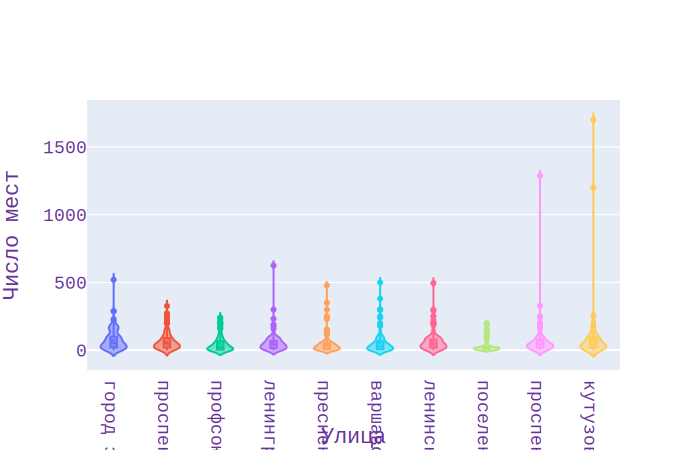

In [58]:
fig = go.Figure()

streets = top_streets['streetname'].unique()

for street in streets:
    fig.add_trace(go.Violin(x=seats_in_top_streets['street'][seats_in_top_streets['street'] == street],
                            y=seats_in_top_streets['number'][seats_in_top_streets['street'] == street],
                            name=street,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    xaxis_title="Улица",
    yaxis_title="Число мест",
    showlegend=False,
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show("svg")

<div style="border:solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
Рекомендую отключить легенду - она повторяет подписи по оси Х</div> <br>

Видим, что на всех улицах количество посадочных мест распределено похожим образом. Основная масса заведений имеют небольшое количество мест, но встречаются и объекты с большим, около 500 числом мест.

Выделяются поселение Сосенское и Профсоюзная улица, на которых не встречается заведений больше 250 мест, а также проспект Вернадского и  Кутузовский проспект с существенно большими заведениями, до 1300 и 1700 мест соответственно.
Посмотрим, что это за заведения.

In [44]:
seats_in_top_streets[seats_in_top_streets['number']>1000]

,index,id,object_name,chain,object_type,address,number,split_addres,street,city
382,382,27024,рум сервис,False,ресторан,"город москва, кутузовский проспект, дом 2/1, строение 1",1200,"[город москва, кутузовский проспект, дом 2/1, строение 1]",кутузовский проспект,город москва
905,905,19719,комбинат питания «управление академсервис»,False,столовая,"город москва, проспект вернадского, дом 84, строение 1",1288,"[город москва, проспект вернадского, дом 84, строение 1]",проспект вернадского,город москва
1310,1310,199696,arena by soho family,False,бар,"город москва, кутузовский проспект, дом 36, строение 11",1700,"[город москва, кутузовский проспект, дом 36, строение 11]",кутузовский проспект,город москва


Также можно построить общий график распределения числа посадочных мест на самых популярных учицах

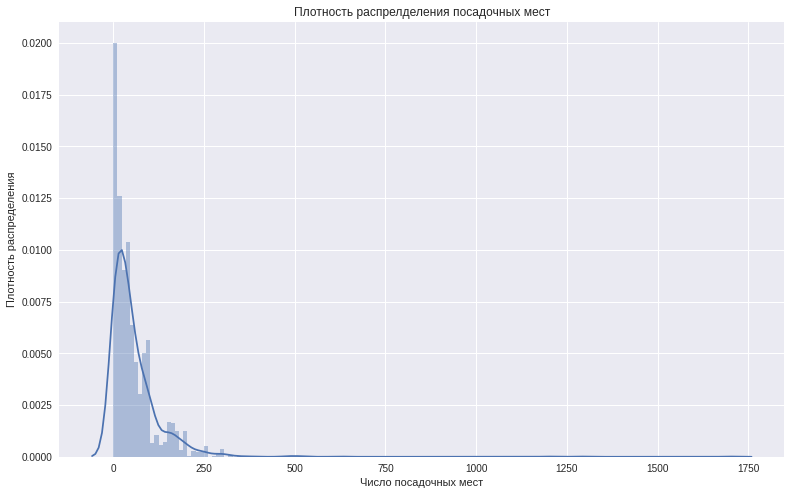

In [45]:
fig, ax = plt.subplots()
ax = sns.distplot(seats_in_top_streets['number'], bins = 150) 

fig.set_size_inches(13, 8)
ax.set( 
       xlabel='Число посадочных мест', 
       ylabel='Плотность распределения', 
       title = 'Плотность распрелделения посадочных мест')
plt.show()

Помимо уже показанного самого распространенного значения около нуля и выбросов до 1700 мест, на этом графике видны небольшие пики в районе 50, 100 и 150 мест. Возможно, это связано с особенностью государственного регулирования этой сферы.

### Вывод

В результате исследования рынка общественного питания г.Москвы выявлены наиболее распространенные значения параметров заведений по типу, размеру и расположению объектов. Наиболее популярным типом заведения общественного питания является кафе. Размер заведения стоит выбрать в районе 40 мест. Месторасположение нового кафе выглядит наиболее выигрышным на основных проспектах и шоссе или в центральной части города. В стратегии долгосрочного развития можно предположить создание сети.

Наибольшая часть (почти 40%) заведений общественного питания - это кафе. Меньше всего в Москве буфетов,кафетериев, закусочных и отделов кулинарии.При этом, сетевых заведений 20%, а несетевых - 80%. В абсолютных числах - 2968 и 12398 соответственно. Наибольшее число сетевых заведений являются предприятиями быстрого обслуживания, они составляют более 30% от общего числа сетевых объектов. За ними идут рестораны (около 24%) и кафе(около 23%). Меньше всего сетевых кулинарий, буфетов и столовых (менее 5% каждый)

По количеству посадочных мест наиболее распространенные занчения небольшие, около 40 мест. Основная часть сетевых объектов не превышают 70 мест, но встречаются заведения с 500-600 посадочными местами. Для сетей - наиболее характерны много объектов с небольшим числом посадочных мест в каждом. В абсолютном большинстве сетей число посадочных мест не превышает 100. Чем больше чиcло объектов в сети, тем чаще встречаются крупные заведения, однако плотность распределения все равно гораздо выше в области низких значений.

В территориальном аспекте в десятку самых популярных улиц для заведений общественного питания вошли основные проспекты и шоссе, на каждом из которых расположено от 100 до 250 объектов. Т.к. большинство популярных улиц проходят через несколько районов Москвы, мы получили 43 района,в которых находятся эти улицы. Для определения популярного месторасположения кафе нужно использовать более точные геоданные. Были также получены данные об улицах с одним объектом. Такие улицы встречаются в центральных районах города с маленькими улочками, а также в спальных районы, где заведений общепита в целом очень мало.

Также был проведен анализ вместимости самых популярных для заведений общепита улиц Москвы. На всех улицах количество посадочных мест распределено похожим образом. Основная масса заведений имеют небольшое количество мест, но встречаются и объекты с большим, около 500 числом мест. Выделяются поселение Сосенское и Профсоюзная улица, на которых не встречается заведений больше 250 мест, а также проспект Вернадского и  Кутузовский проспект с существенно большими заведениями, до 1300 и 1700 мест соответственно. В целом, на графике распределения числа мест видны небольшие пики в районе 50, 100 и 150 мест, которые могут быть связаны с особенностью государственного регулирования этой сферы.